In [14]:
import pandas as pd 
data = pd.read_csv('D:/Working/PRP-2021-Summer/Data/Raw_Data/gps_20161101.csv').head(100)
print(data.describe())
len(data)

         1477969147   104.07513    30.72724
count  1.000000e+02  100.000000  100.000000
mean   1.477982e+09  104.049765   30.693551
std    5.500781e+03    0.011078    0.013890
min    1.477969e+09  104.042750   30.682970
25%    1.477984e+09  104.044500   30.685163
50%    1.477984e+09  104.045475   30.689235
75%    1.477984e+09  104.046835   30.691987
max    1.477984e+09  104.075760   30.727020


100

In [16]:
import pandas as pd 
data = pd.read_csv('D:/Working/PRP-2021-Summer/Data/Processed_Data/DATASET-B.csv')
data_speed = data[(data['date']==20161101)]['aveSpeed']
statistics = data_speed.describe()#保存基本统计量      
statistics.loc['range']=statistics.loc['max']-statistics.loc['min']#极差 
statistics.loc['var']=statistics.loc['std']/statistics.loc['mean']#变异系数  
statistics.loc['dis']=statistics.loc['75%']-statistics.loc['25%']#四分位数间距 
print (statistics)
statistics.to_csv('statistics.csv')

count    143314.000000
mean         10.200424
std           3.678482
min           3.983647
25%           7.377992
50%           9.969390
75%          12.933675
max          17.445003
range        13.461357
var           0.360621
dis           5.555683
Name: aveSpeed, dtype: float64


In [2]:
data_vol = data[data['time_id']==50].groupby(['date'])['volume'].sum()
df = pd.DataFrame(data_vol)
df = df.reset_index(drop=False)
from datetime import datetime
df['day'] = df['date'].apply(lambda x: datetime.strptime(str(x), "%Y%m%d").weekday()+1)
# weekday()函数返回值：周一为0，周日为6

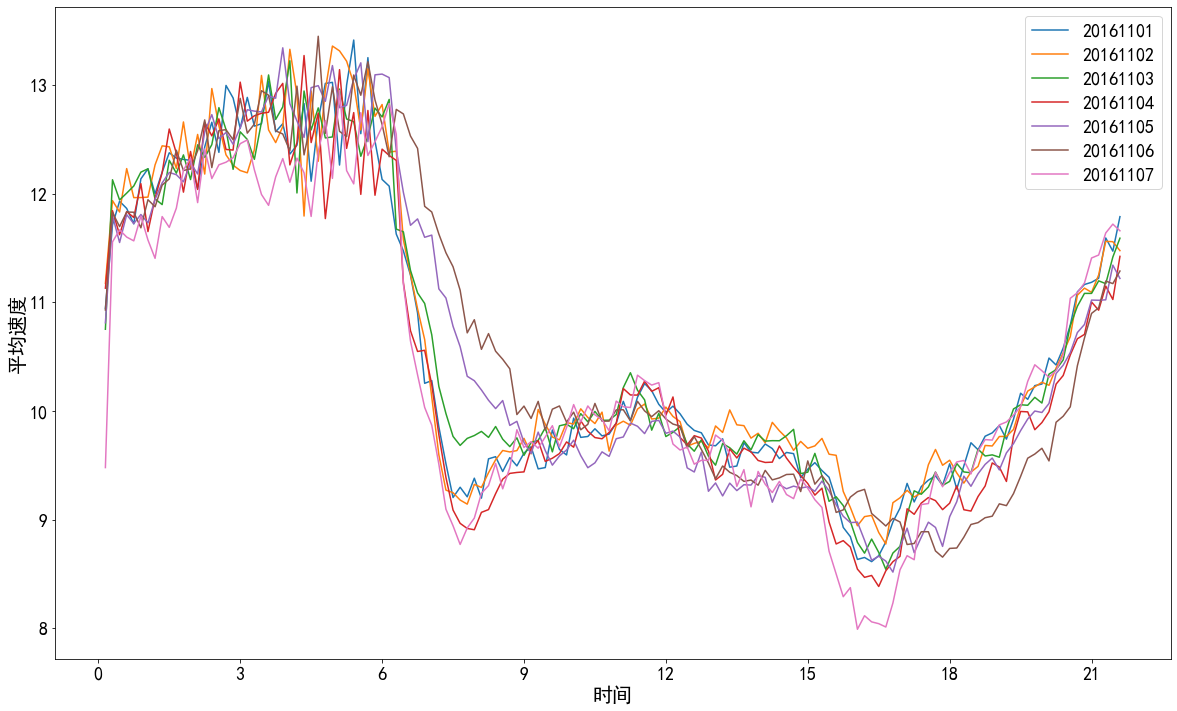

In [3]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams['font.sans-serif'] = 'SimHei' 
data_all = pd.read_csv('D:/Working/PRP-2021-Summer/Data/Raw_Data/DATASET-B.csv')  
data_20161101_02 = data_all[(data_all['date']==20161101) | (data_all['date']==20161102) | (data_all['date']==20161103)
                            | (data_all['date']==20161104) | (data_all['date']==20161105) | (data_all['date']==20161106)
                           | (data_all['date']==20161107)]  
fig = plt.figure(figsize=(20,12))  
x = np.arange(1, 145)  
y1 = data_20161101_02[data_20161101_02['date']==20161101].groupby('time_id')['aveSpeed'].mean()  
y2 = data_20161101_02[data_20161101_02['date']==20161102].groupby('time_id')['aveSpeed'].mean()
y3 = data_20161101_02[data_20161101_02['date']==20161103].groupby('time_id')['aveSpeed'].mean()
y4 = data_20161101_02[data_20161101_02['date']==20161104].groupby('time_id')['aveSpeed'].mean()
y5 = data_20161101_02[data_20161101_02['date']==20161105].groupby('time_id')['aveSpeed'].mean()
y6 = data_20161101_02[data_20161101_02['date']==20161106].groupby('time_id')['aveSpeed'].mean()
y7 = data_20161101_02[data_20161101_02['date']==20161107].groupby('time_id')['aveSpeed'].mean()
plt.plot(x, y1, label='20161101');  
plt.plot(x, y2, label='20161102');
plt.plot(x, y3, label='20161103');
plt.plot(x, y4, label='20161104');
plt.plot(x, y5, label='20161105');
plt.plot(x, y6, label='20161106');
plt.plot(x, y7, label='20161107');
plt.xticks(np.arange(0,145,20), np.arange(0,24,3)); # 映射到二十四点  
plt.legend(fontsize=18, loc='upper right');    
plt.tick_params(labelsize=18);    
plt.xlabel('时间', fontsize=20);    
plt.ylabel('平均速度', fontsize=20);  
plt.savefig('1-7平均速度线型图'); 

# 每周每天相对时间的平均速度趋势相似
# 平均车速折线两端局部最低分别对应早晚高峰（7：00-9：00；16：00-18：00）
# 其中5号6号为周末，在早高峰时段相对车速较高

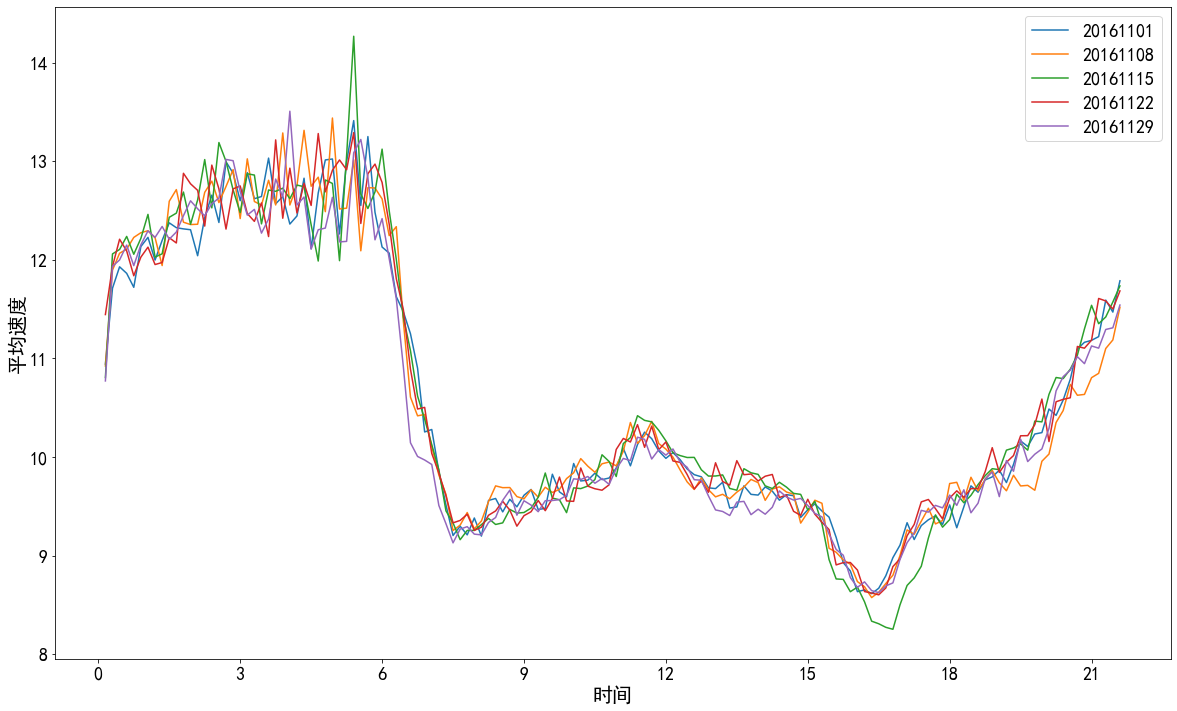

In [4]:
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams['font.sans-serif'] = 'SimHei' 
data_20161101_02 = data_all[(data_all['date']==20161101) | (data_all['date']==20161108) | (data_all['date']==20161115)
                            | (data_all['date']==20161122) | (data_all['date']==20161129)]  
fig = plt.figure(figsize=(20,12))  
x = np.arange(1, 145)  
y1 = data_20161101_02[data_20161101_02['date']==20161101].groupby('time_id')['aveSpeed'].mean()  
y2 = data_20161101_02[data_20161101_02['date']==20161108].groupby('time_id')['aveSpeed'].mean()
y3 = data_20161101_02[data_20161101_02['date']==20161115].groupby('time_id')['aveSpeed'].mean()
y4 = data_20161101_02[data_20161101_02['date']==20161122].groupby('time_id')['aveSpeed'].mean()
y5 = data_20161101_02[data_20161101_02['date']==20161129].groupby('time_id')['aveSpeed'].mean()
plt.plot(x, y1, label='20161101');  
plt.plot(x, y2, label='20161108');
plt.plot(x, y3, label='20161115');
plt.plot(x, y4, label='20161122');
plt.plot(x, y5, label='20161129');
plt.xticks(np.arange(0,145,20), np.arange(0,24,3)); # 映射到二十四点  
plt.legend(fontsize=18, loc='upper right');    
plt.tick_params(labelsize=18);    
plt.xlabel('时间', fontsize=20);    
plt.ylabel('平均速度', fontsize=20);  
plt.savefig('五个周二平均速度线型图'); 

# 每周同一天（工作日）相对时间的平均速度趋势具有高度一致性
# 在早/晚高峰时段一致性尤为明显

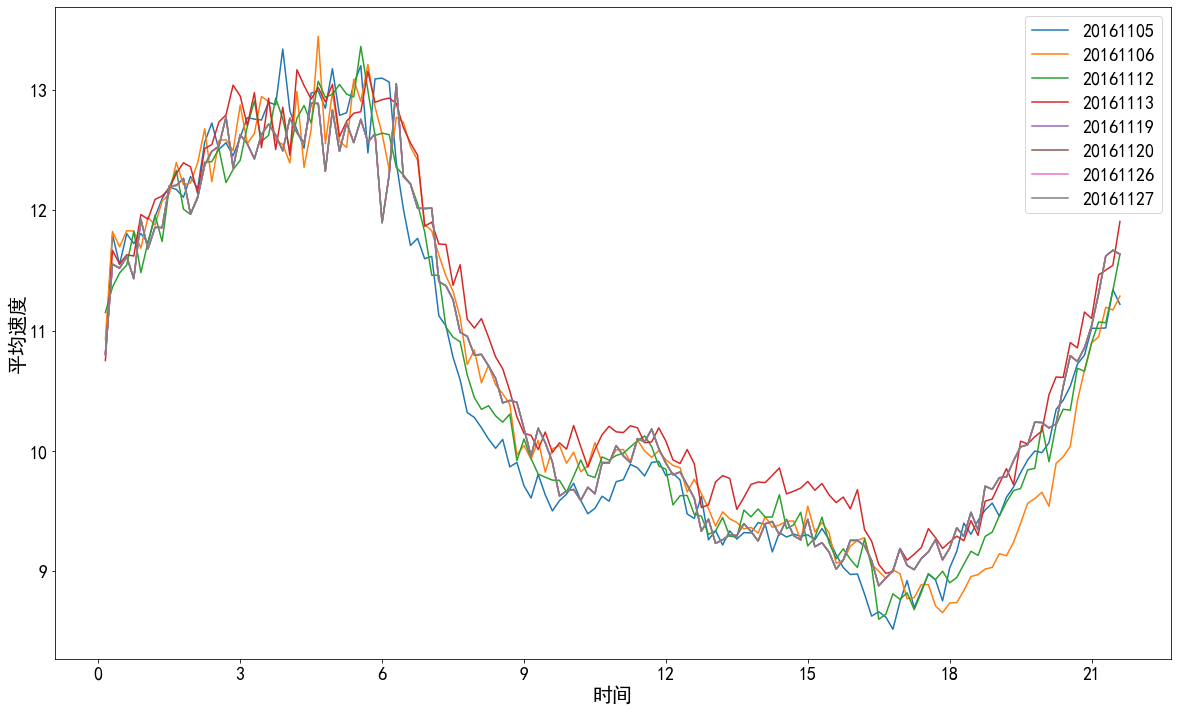

In [5]:
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams['font.sans-serif'] = 'SimHei' 
data_20161101_02 = data_all[(data_all['date']==20161105) | (data_all['date']==20161106) | (data_all['date']==20161112)
                            | (data_all['date']==20161113) | (data_all['date']==20161119) | (data_all['date']==20161120)
                            | (data_all['date']==20161126) | (data_all['date']==20161127)]  
fig = plt.figure(figsize=(20,12))  
x = np.arange(1, 145)  
y1 = data_20161101_02[data_20161101_02['date']==20161105].groupby('time_id')['aveSpeed'].mean()  
y2 = data_20161101_02[data_20161101_02['date']==20161106].groupby('time_id')['aveSpeed'].mean()
y3 = data_20161101_02[data_20161101_02['date']==20161112].groupby('time_id')['aveSpeed'].mean()
y4 = data_20161101_02[data_20161101_02['date']==20161113].groupby('time_id')['aveSpeed'].mean()
y5 = data_20161101_02[data_20161101_02['date']==20161119].groupby('time_id')['aveSpeed'].mean()
y5 = data_20161101_02[data_20161101_02['date']==20161120].groupby('time_id')['aveSpeed'].mean()
y5 = data_20161101_02[data_20161101_02['date']==20161126].groupby('time_id')['aveSpeed'].mean()
y5 = data_20161101_02[data_20161101_02['date']==20161127].groupby('time_id')['aveSpeed'].mean()
plt.plot(x, y1, label='20161105');  
plt.plot(x, y2, label='20161106');
plt.plot(x, y3, label='20161112');
plt.plot(x, y4, label='20161113');
plt.plot(x, y5, label='20161119');
plt.plot(x, y5, label='20161120');
plt.plot(x, y5, label='20161126');
plt.plot(x, y5, label='20161127');
plt.xticks(np.arange(0,145,20), np.arange(0,24,3)); # 映射到二十四点  
plt.legend(fontsize=18, loc='upper right');    
plt.tick_params(labelsize=18);    
plt.xlabel('时间', fontsize=20);    
plt.ylabel('平均速度', fontsize=20);  
plt.savefig('四个周末平均速度线型图'); 

# 每周周末相对时间的平均速度趋势同样具有高度一致性

In [9]:
from bokeh.plotting import figure  
from bokeh.io import output_notebook, show, output_file
import numpy as np
import pandas as pd 
data_all = pd.read_csv('D:/Working/PRP-2021-Summer/Data/Raw_Data/DATASET-B.csv')  
data_20161101_02 = data_all[(data_all['date']==20161101) | (data_all['date']==20161102)]    
data = data_20161101_02[(data_20161101_02['date']==20161101) & (data_20161101_02['time_id']==50)]    
data = data.reset_index(drop=True)
data['stop_or_not'] = data['stopNum'].apply(lambda x: 0 if x==0 else 1)   
data['volume_CATE'] = data['volume']//5 
grouped = data.groupby('volume_CATE')  
speed = grouped.aveSpeed
stop = list(grouped.groups) 
avg, std = speed.mean(), speed.std()  
stop_0 = data[data['stop_or_not']==0]  
stop_1 = data[data['stop_or_not']==1]  
p = figure(x_axis_label='流量', y_axis_label='速度')  
p.vbar(x=stop, bottom=avg-std, top=avg+std, width=0.8,   
       fill_alpha=0.2, line_color=None, legend="平均速度 标准差")  
p.circle(x=stop_0["volume_CATE"], y=stop_0["aveSpeed"], size=5, alpha=0.8,  
        color=(73,132,175), legend="停车次数为0")  
p.square(x=stop_1["volume_CATE"], y=stop_1["aveSpeed"], size=5, alpha=0.8,  
        color=(255,132,23), legend="停车次数不为0")  
p.legend.location = "top_left"  
show(p);

In [10]:
data = data_20161101_02[(data_20161101_02['date']==20161101) & (data_20161101_02['time_id']==50)]    
data = data.reset_index(drop=True)
data['stop_or_not'] = data['stopNum'].apply(lambda x: 0 if x==0 else 1)   
data['volume_CATE'] = data['volume']//5 
grouped = data.groupby('volume_CATE')  
speed = grouped.gridAcc
stop = list(grouped.groups) 
avg, std = speed.mean(), speed.std()  
stop_0 = data[data['stop_or_not']==0]  
stop_1 = data[data['stop_or_not']==1]  
p = figure(x_axis_label='流量', y_axis_label='加速度')  
p.vbar(x=stop, bottom=avg-std, top=avg+std, width=0.8,   
       fill_alpha=0.2, line_color=None, legend="平均加速度 标准差")  
p.circle(x=stop_0["volume_CATE"], y=stop_0["gridAcc"], size=5, alpha=0.8,  
        color=(73,132,175), legend="停车次数为0")  
p.square(x=stop_1["volume_CATE"], y=stop_1["gridAcc"], size=5, alpha=0.8,  
        color=(255,132,23), legend="停车次数不为0")  
p.legend.location = "top_left"  
show(p);

In [11]:
from bokeh.models import ColumnDataSource  
from bokeh.layouts import gridplot    
source = ColumnDataSource(data)  
options = dict(plot_width=300, plot_height=300,  
               tools="pan,wheel_zoom,box_zoom,box_select,lasso_select");  
p1 = figure(title="流量 vs. 平均速度", **options,  
            x_axis_label='流量', y_axis_label='平均速度');  
p1.circle("volume", "aveSpeed", color=(73,132,175), source=source); 
p2 = figure(title="流量 vs. 平均加速度", **options,  
            x_axis_label='流量', y_axis_label='平均加速度');  
p2.circle("volume", "gridAcc", color="cadetblue", source=source);   
p3 = figure(title="平均速度 vs. 平均加速度", **options,  
            x_axis_label='平均速度', y_axis_label='平均加速度');  
p3.circle("aveSpeed", "gridAcc", color=(255,132,23), fill_color=None, source=source);   
p = gridplot([[ p1, p2, p3]], toolbar_location="right");  
show(p);


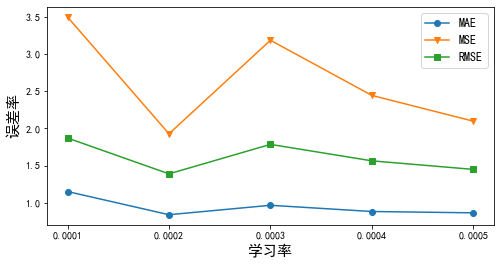

In [34]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams['font.sans-serif'] = 'SimHei' 
# data_all = pd.read_csv('D:/Working/SJTU/PRP-2021-Summer/Data/Processed_Data/DATASET-B.csv')  
fig = plt.figure(figsize=(8,4))  
x = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]  
y1 = [1.1502889394760132, 0.8380084037780762, 0.9650461673736572, 0.8811435699462891, 0.8633585572242737]  
y2 = [3.5005223751068115, 1.9279078245162964, 3.1874985694885254, 2.4448084831237793, 2.0976603031158447]
y3 = [1.8709683418273926, 1.388491153717041, 1.7853567600250244, 1.5635883808135986, 1.4483301639556885]
plt.plot(x, y1, label='MAE', marker = 'o');  
plt.plot(x, y2, label='MSE', marker = 'v');
plt.plot(x, y3, label='RMSE', marker = 's');
plt.xticks(np.arange(0.0001,0.0006,0.0001));  
plt.legend(fontsize=12, loc='upper right');    
# plt.tick_params(labelsize=18);    
plt.xlabel('学习率', fontsize=15);    
plt.ylabel('误差率', fontsize=15);  
plt.savefig('lr'); 

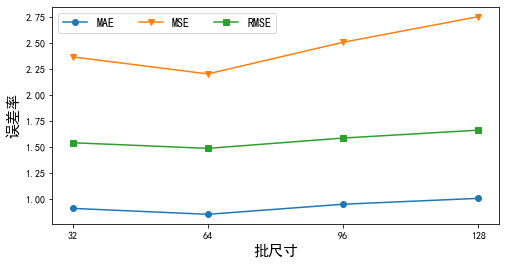

In [38]:
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams['font.sans-serif'] = 'SimHei' 
# data_all = pd.read_csv('D:/Working/SJTU/PRP-2021-Summer/Data/Processed_Data/DATASET-B.csv')  
fig = plt.figure(figsize=(8,4))  
x = [32, 64, 96, 128]  
y1 = [0.9054922461509705, 0.848264753818512, 0.9453760385513306, 1.002068042755127]  
y2 = [2.3645567893981934, 2.2004141807556152, 2.505115509033203, 2.751910448074341]
y3 = [1.537711501121521, 1.4833793640136719, 1.5827556848526, 1.658888339996338]
plt.plot(x, y1, label='MAE', marker = 'o');  
plt.plot(x, y2, label='MSE', marker = 'v');
plt.plot(x, y3, label='RMSE', marker = 's');
plt.xticks(np.arange(32,160,32));  
plt.legend(fontsize=12, loc='upper left', ncol=3);    
# plt.tick_params(labelsize=18);    
plt.xlabel('批尺寸',fontsize=15);    
plt.ylabel('误差率', fontsize=15);  
plt.savefig('lr'); 